In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression

In [2]:
sales_data = pd.read_csv("sales_2019.csv")

In [3]:
sales_data['Date'] = sales_data['Order Date'].str.split(' ').str[0]

In [4]:
print(sales_data)

        Order ID                     Product  Quantity Ordered  Price Each  \
0         141234                      iPhone                 1      700.00   
1         141235    Lightning Charging Cable                 1       14.95   
2         141236            Wired Headphones                 2       11.99   
3         141237            27in FHD Monitor                 1      149.99   
4         141238            Wired Headphones                 1       11.99   
...          ...                         ...               ...         ...   
185945    319666    Lightning Charging Cable                 1       14.95   
185946    319667       AA Batteries (4-pack)                 2        3.84   
185947    319668             Vareebadd Phone                 1      400.00   
185948    319669            Wired Headphones                 1       11.99   
185949    319670  Bose SoundSport Headphones                 1       99.99   

              Order Date                        Purchase Addres

In [5]:
sales_data['Date'] = pd.to_datetime(sales_data['Date'])

In [6]:
sales_data['Total Revenue'] = sales_data['Quantity Ordered'] * sales_data['Price Each']

In [7]:
sales_data['Date'] = sales_data['Date'].dt.to_period("W")
weekly_sales = sales_data.groupby('Date').sum().reset_index()

C:\Users\16096\AppData\Local\Temp\ipykernel_17948\3332045095.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  weekly_sales = sales_data.groupby('Date').sum().reset_index()


In [8]:
weekly_sales['Date'] = weekly_sales['Date'].dt.to_timestamp()

In [9]:
sales_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Date,Total Revenue
0,141234,iPhone,1,700.00,1/22/2019 21:25,"944 Walnut St, Boston, MA 02215",2019-01-21/2019-01-27,700.00
1,141235,Lightning Charging Cable,1,14.95,1/28/2019 14:15,"185 Maple St, Portland, OR 97035",2019-01-28/2019-02-03,14.95
2,141236,Wired Headphones,2,11.99,1/17/2019 13:33,"538 Adams St, San Francisco, CA 94016",2019-01-14/2019-01-20,23.98
3,141237,27in FHD Monitor,1,149.99,1/5/2019 20:33,"738 10th St, Los Angeles, CA 90001",2018-12-31/2019-01-06,149.99
4,141238,Wired Headphones,1,11.99,1/25/2019 11:59,"387 10th St, Austin, TX 73301",2019-01-21/2019-01-27,11.99


In [10]:
weekly_sales.head(12)

,Date,Order ID,Quantity Ordered,Price Each,Total Revenue
0,2018-12-31,264676561,2045,343062.87,344855.67
1,2019-01-07,320652796,2457,407539.11,409428.28
2,2019-01-14,320699601,2462,392745.06,394936.90
3,2019-01-21,326355369,2525,424518.30,426632.16
4,2019-01-28,374634901,2780,456563.41,460355.55
5,2019-02-04,463423874,3299,563327.94,566203.88
6,2019-02-11,477567253,3435,565026.42,568227.10
7,2019-02-18,466805211,3397,530962.84,535323.33
8,2019-02-25,516065468,3543,575845.83,578418.38
9,2019-03-04,581016726,3843,637208.90,640535.27


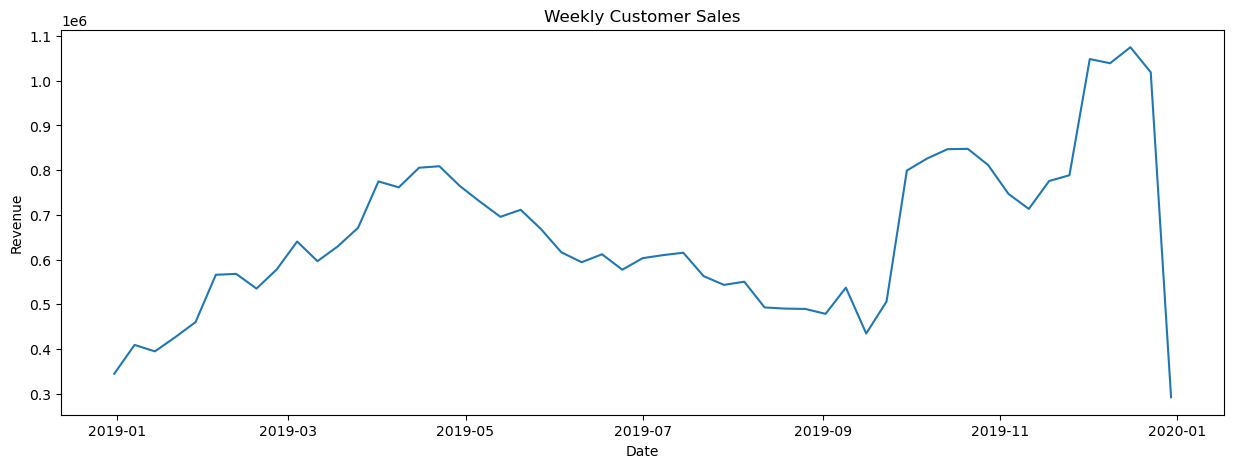

In [11]:
plt.figure(figsize=(15,5))
plt.plot(weekly_sales['Date'], weekly_sales['Total Revenue'])
plt.xlabel("Date")
plt.ylabel("Revenue")
plt.title("Weekly Customer Sales")
plt.show()

In [12]:
weekly_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53 entries, 0 to 52
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Date              53 non-null     datetime64[ns]
 1   Order ID          53 non-null     int64         
 2   Quantity Ordered  53 non-null     int64         
 3   Price Each        53 non-null     float64       
 4   Total Revenue     53 non-null     float64       
dtypes: datetime64[ns](1), float64(2), int64(2)
memory usage: 2.2 KB


In [13]:
weekly_sales['sales_diff'] = weekly_sales['Total Revenue'].diff()
weekly_sales = weekly_sales.dropna()
weekly_sales.head()

,Date,Order ID,Quantity Ordered,Price Each,Total Revenue,sales_diff
1,2019-01-07,320652796,2457,407539.11,409428.28,64572.61
2,2019-01-14,320699601,2462,392745.06,394936.90,-14491.38
3,2019-01-21,326355369,2525,424518.30,426632.16,31695.26
4,2019-01-28,374634901,2780,456563.41,460355.55,33723.39
5,2019-02-04,463423874,3299,563327.94,566203.88,105848.33


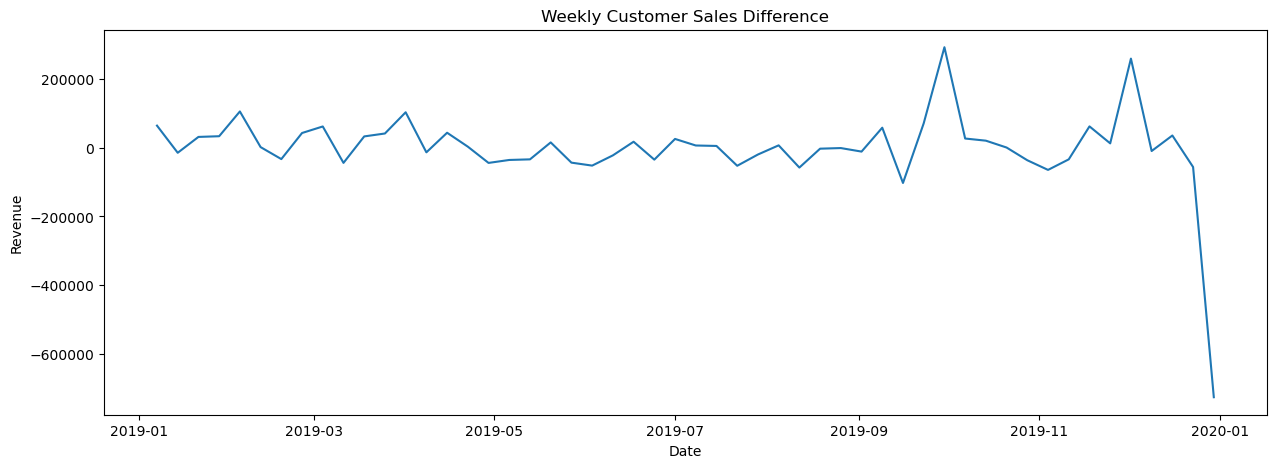

In [14]:
plt.figure(figsize=(15,5))
plt.plot(weekly_sales['Date'], weekly_sales['sales_diff'])
plt.xlabel("Date")
plt.ylabel("Revenue")
plt.title("Weekly Customer Sales Difference")
plt.show()

In [15]:
supervised_data = weekly_sales.drop(['Date', 'Order ID'], axis=1)

In [16]:
column_to_move = supervised_data.pop("Total Revenue")
supervised_data.insert(0,"Total Revenue", column_to_move)

In [17]:
print(supervised_data.head(13))

    Total Revenue  Quantity Ordered  Price Each  sales_diff
1       409428.28              2457   407539.11    64572.61
2       394936.90              2462   392745.06   -14491.38
3       426632.16              2525   424518.30    31695.26
4       460355.55              2780   456563.41    33723.39
5       566203.88              3299   563327.94   105848.33
6       568227.10              3435   565026.42     2023.22
7       535323.33              3397   530962.84   -32903.77
8       578418.38              3543   575845.83    43095.05
9       640535.27              3843   637208.90    62116.89
10      596595.99              3865   593018.15   -43939.28
11      629763.90              3867   626002.79    33167.91
12      671432.83              3798   667535.91    41668.93
13      774904.91              4761   769298.11   103472.08


In [18]:
train_data = supervised_data[:-13] 
test_data = supervised_data[-13:]
print("Train Data Shape: ", train_data.shape)
print("Test Data Shape: ", test_data.shape)

Train Data Shape:  (39, 4)
Test Data Shape:  (13, 4)


In [19]:
scaler = MinMaxScaler(feature_range=(-1,1))
scaler.fit(train_data)
train_data = scaler.transform(train_data)
test_data = scaler.transform(test_data)

In [20]:
X_train, y_train = train_data[:,1:], train_data[:,0:1]
X_test, y_test = test_data[:,1:], test_data[:,0:1]
y_train = y_train.ravel()
y_test = y_test.ravel()
print("X_train Shape: ", X_train.shape)
print("y_train Shape: ", y_train.shape)
print("X_test Shape: ", X_test.shape)
print("y_test Shape: ", y_test.shape)

X_train Shape:  (39, 3)
y_train Shape:  (39,)
X_test Shape:  (13, 3)
y_test Shape:  (13,)


In [21]:
sales_dates = weekly_sales['Date'][-13:].reset_index(drop=True)
predict_df = pd.DataFrame(sales_dates)

In [22]:
act_sales = weekly_sales['Total Revenue'][-14:].to_list()
print(act_sales)

[799212.5, 826241.75, 846999.42, 847769.59, 811488.35, 747093.9, 713430.04, 775799.61, 788703.8, 1048487.0, 1039123.6900000001, 1074953.03, 1018951.88, 292444.4]


In [23]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_pre = lr_model.predict(X_test)

In [24]:
lr_pre = lr_pre.reshape(-1,1)
lr_pre_test_set = np.concatenate([lr_pre, X_test],axis=1)
lr_pre_test_set = scaler.inverse_transform(lr_pre_test_set)

In [25]:
result_list = []
for index in range(0,len(lr_pre_test_set)):
    result_list.append(lr_pre_test_set[index][0] + act_sales[index])
lr_pre_series = pd.Series(result_list, name="Linear Prediction")
predict_df = predict_df.merge(lr_pre_series, left_index = True, right_index = True)

In [26]:
lr_mse = np.sqrt(mean_squared_error(predict_df['Linear Prediction'], weekly_sales['Total Revenue'][-13:]))
lr_mae = mean_absolute_error(predict_df['Linear Prediction'], weekly_sales['Total Revenue'][-13:])
lr_r2 = r2_score(predict_df['Linear Prediction'], weekly_sales['Total Revenue'][-13:])
print("Linear Regression MSE: ", lr_mse)
print("Linear Regression MAE: ", lr_mae)
print("Linear Regression R2: ", lr_r2)

Linear Regression MSE:  881243.7486177473
Linear Regression MAE:  872842.0473552226
Linear Regression R2:  -11.671173042858733


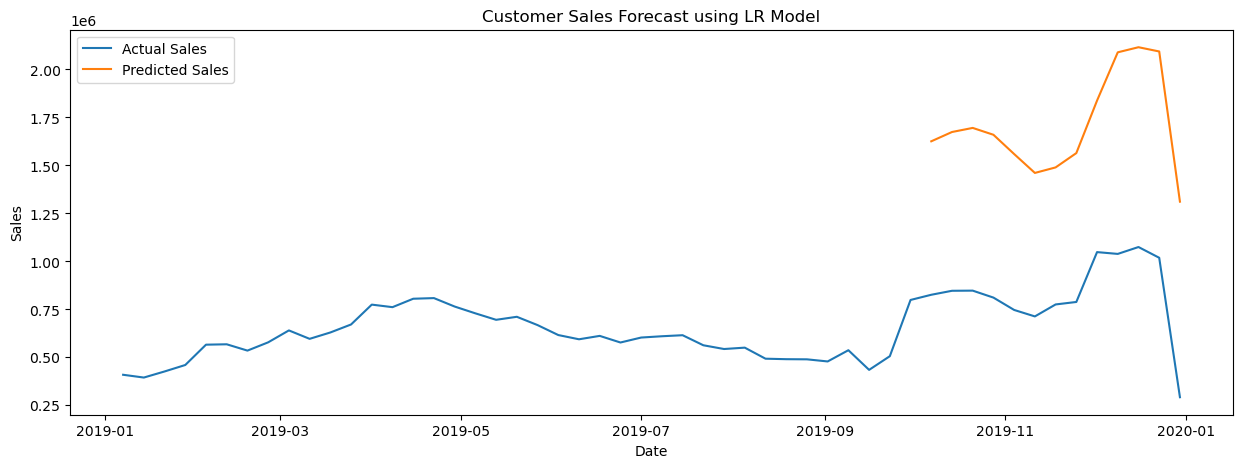

In [27]:
plt.figure(figsize=(15,5))
plt.plot(weekly_sales['Date'], weekly_sales['Total Revenue'])
plt.plot(predict_df['Date'], predict_df['Linear Prediction'])
plt.title("Customer Sales Forecast using LR Model")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.legend(['Actual Sales', 'Predicted Sales'])
plt.show()

# Decision Regression

# Random Forest Regression